<a href="https://colab.research.google.com/github/sthirug/aiml/blob/main/Generic_Ngram_Conventional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import os

In [ ]:
ngram_size = 3
input_size = ngram_size - 1

#all_names = open('/content/drive/MyDrive/Colab Notebooks/names.txt','r').read().lower()
all_names = open('/content/drive/MyDrive/Colab Notebooks/DL Experiments/IndianNames.txt','r').read().lower()

unclean = ['.', ' ','-']
for u in unclean:
  all_names = all_names.replace(u, '')

words = all_names.splitlines()
len(words)

55691

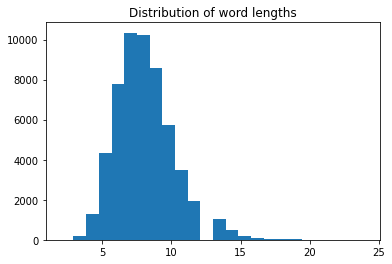

In [ ]:
import matplotlib.pyplot as plt

w_lens = [len(w) for w in words]

plt.hist(w_lens, bins=max(w_lens))
plt.title('Distribution of word lengths')
plt.show()

In [ ]:
uchars = ['.'] + sorted(set(''.join(words)))
l=len(uchars)
uchars

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
prefix = ''.join(['.' for _ in range(input_size)])
print(prefix)

tp = [l for _ in range(ngram_size)]
dim_size = tuple(tp)
dim_size

..


(27, 27, 27)

In [ ]:
examples = []

for w in words:
  w = prefix + w + '.'
  #print(w)
  for i in range(len(w) - input_size):
    t = w[i:i+ngram_size]
    examples.append([t[:input_size], t[input_size:]])

examples[:10]

[['..', 'a'],
 ['.a', 'a'],
 ['aa', 'b'],
 ['ab', 'a'],
 ['ba', 'n'],
 ['an', '.'],
 ['..', 'a'],
 ['.a', 'a'],
 ['aa', 'b'],
 ['ab', 'h']]

In [ ]:
stoi = {c:i for i,c in enumerate(uchars)}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [ ]:
itos = {i:c for i,c in enumerate(uchars)}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [ ]:
N = torch.zeros(dim_size)
N.shape
N[0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

In [ ]:
#N = torch.zeros(l,l,l)
N = torch.zeros(dim_size)

for e in examples:
  ixes = []
  ex = e[0] + e[1]

  for i in range(ngram_size):
    c = ex[i]
    ix = stoi.get(c)
    ixes.append(ix)

  dims = tuple(ixes)
  N[dims] += 1

N.sum()

tensor(505457.)

In [ ]:
#print(len(examples))
#N[0][0][0].item()

In [ ]:
N.add_(torch.ones(1))
N.sum()

tensor(525140.)

In [ ]:
#len(words)
#N.reshape(27**2,27).sum(dim = 1).shape

In [ ]:
T = N.sum(dim =(ngram_size-1), keepdim=True)
T.shape

torch.Size([27, 27, 1])

In [ ]:
# #spot check
# key = 'ab'
# ix1 = stoi.get(key[:1])
# ix2 = stoi.get(key[1:2])
# print('Sum from N/T -> {}'.format(T[ix1][ix2].item()))

# temp = [e for e in examples if e[0] == key]
# #print(temp[:10])
# print(len(temp) + l)

# N[1][5]
# 6/N[1][5].sum()
# P[1][5]

In [ ]:
P = N/T

In [ ]:
# N   ->.  27 x 27 x 27
# T.  ->.  27 x 27 x  1

In [ ]:
#make prediction
itts = 0
ntp = 10

for _ in range(ntp):
  pred = ''

  ixes = [0 for _ in range(ngram_size - 1)]

  while True:
    dims = tuple(ixes)
    p = P[dims]

    ix = torch.multinomial(p, 1, replacement=True).item()

    if ix == 0:
      if len(pred.strip()) == 0:
        print(f'{pred=}')
        print(f'{dims=}')
        print(p)
      break;

    pred += itos[ix]

    for j in range(ngram_size - 2):
      ixes[j] = ixes[j + 1]

    ixes[-1] = ix

  print(pred)

  if pred in words:
    itts += 1
    print(f'******{pred} in training set')

print(f'####### {itts*100/ntp}% predictions were in training set')

sugavkiraganthya
mi
yogavyamsan
thiya
******thiya in training set
maaman
han
eshimaysenthi
neilamshapripripiranan
tyashieertejathurg
aharahan
####### 10.0% predictions were in training set


In [ ]:
# Calculate the loss

ll = 0
n = 0

for e in examples:
  ixes = [stoi.get(c) for c in e[0]]
  # print(e, ixes)

  iy = [stoi.get(e[1])]

  dims = tuple(ixes + iy)
  p = P[dims]

  ll += torch.log(p)
  n += 1

loss = -(ll/n).item()
  
# print(ll)
# print(ll/n)
print(f'{loss=}')
print(f'{n=}')

loss=2.016958713531494
n=505457


**Interesting observation**

Names.txt | Loss for various N-gram values
N-gram -> Loss

* 2 -> 2.45
* 3 -> 2.21
* 4 -> 2.08
* 5 -> 2.15
* 6 -> 2.27

IndianNames.txt | Loss for various N-gram values
N-gram -> Loss

* 2 -> 2.1828
* 3 -> 2.0169
* 4 -> 1.8963
* 5 -> 1.8975
* 6 -> 1.9927